In [1]:
from google.colab import files
uploaded = files.upload()

Saving daup dataset 2 project.zip to daup dataset 2 project (1).zip


In [2]:
import zipfile
import os
zip_path = '/content/daup dataset 2 project (1).zip'
extract_path = '/content/brain_tumour_dataset_daup'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extracts to a folder

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Path to your dataset
base_dir = '/content/brain_tumour_dataset_daup'
train_dir = os.path.join(base_dir, 'Training')
test_dir = os.path.join(base_dir, 'Testing')

# Image settings
img_height, img_width = 150, 150
batch_size = 32
num_classes = 4
class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load data
train_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_dir, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='categorical', shuffle=True)

test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir, target_size=(img_height, img_width), batch_size=batch_size,
    class_mode='categorical', shuffle=False)

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_gen, epochs=10, validation_data=test_gen)

# Predict probabilities
y_score = model.predict(test_gen)
y_true = test_gen.classes
y_true_bin = label_binarize(y_true, classes=range(num_classes))

# ROC curve and AUC
fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
colors = cycle(['red', 'blue', 'green', 'orange'])
plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Brain MRI Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 243s 1s/step - accuracy: 0.6258 - loss: 0.9276 - val_accuracy: 0.8078 - val_loss: 0.4776
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8453 - loss: 0.4037 - val_accuracy: 0.8841 - val_loss: 0.3085
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.8992 - loss: 0.2639 - val_accuracy: 0.9024 - val_loss: 0.2745
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.9402 - loss: 0.1765 - val_accuracy: 0.9382 - val_loss: 0.1887
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9479 - loss: 0.1389 - val_accuracy: 0.9420 - val_loss: 0.1703
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9587 - loss: 0.1056 - val_accuracy: 0.9413 - val_loss: 0.1778
Epoch 7/10
 47/179 ━━━━━━━━━━━━━━━━━━━━ 2:58 1s/step - accuracy: 0.9790 - loss: 0.0707

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 378ms/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.89      0.88      0.88       300
  meningioma       0.83      0.69      0.76       306
     notumor       0.89      0.99      0.94       405
   pituitary       0.94      0.97      0.95       300

    accuracy                           0.89      1311
   macro avg       0.89      0.88      0.88      1311
weighted avg       0.89      0.89      0.89      1311

Confusion Matrix:
 [[263  31   1   5]
 [ 33 212  47  14]
 [  0   3 402   0]
 [  1   8   0 291]]


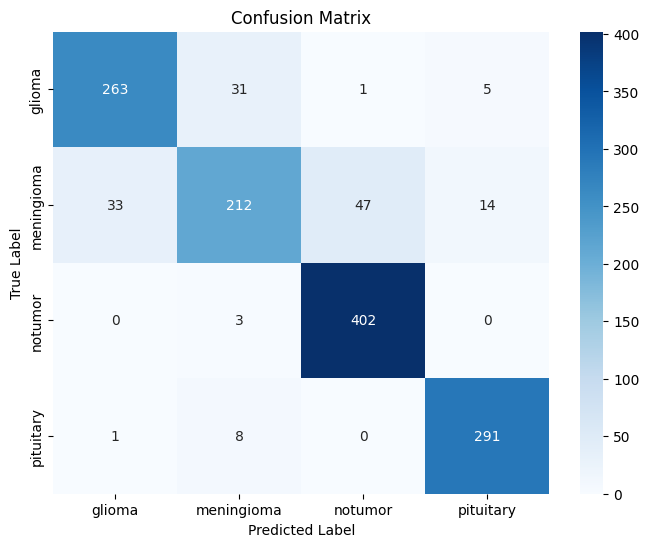

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import seaborn as sns

# Evaluate the model
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Display RGB and Grayscale images
def display_images(generator):
  """Displays RGB and grayscale versions of images from the generator."""
  x_batch, y_batch = next(generator)
  for i in range(6):  # Display 5 images
    image = x_batch[i]
    # Convert to grayscale
    gray_image = tf.image.rgb_to_grayscale(image)

    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("RGB Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(gray_image[:, :, 0], cmap='gray')  # Display the single channel
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.show()

# Call the function to display images
display_images(test_gen)

NameError: name 'test_gen' is not defined